<a href="https://colab.research.google.com/github/primojavier/Azure_Deep/blob/master/Warehouses_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Import dataset and EDA and Clean

In [2]:
df=pd.read_csv('/content/seeds_dataset.csv', index_col='ID')

In [3]:
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
ID,,,,,,,,
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [5]:
# Columns
features = df.columns[:-1]
features_T = ['area_T', 'perimeter_T', 'compactness_T', 'lengthOfKernel_T', 'widthOfKernel_T','asymmetryCoefficient_T', 'lengthOfKernelGroove_T']

In [6]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<Figure size 300x200 with 0 Axes>

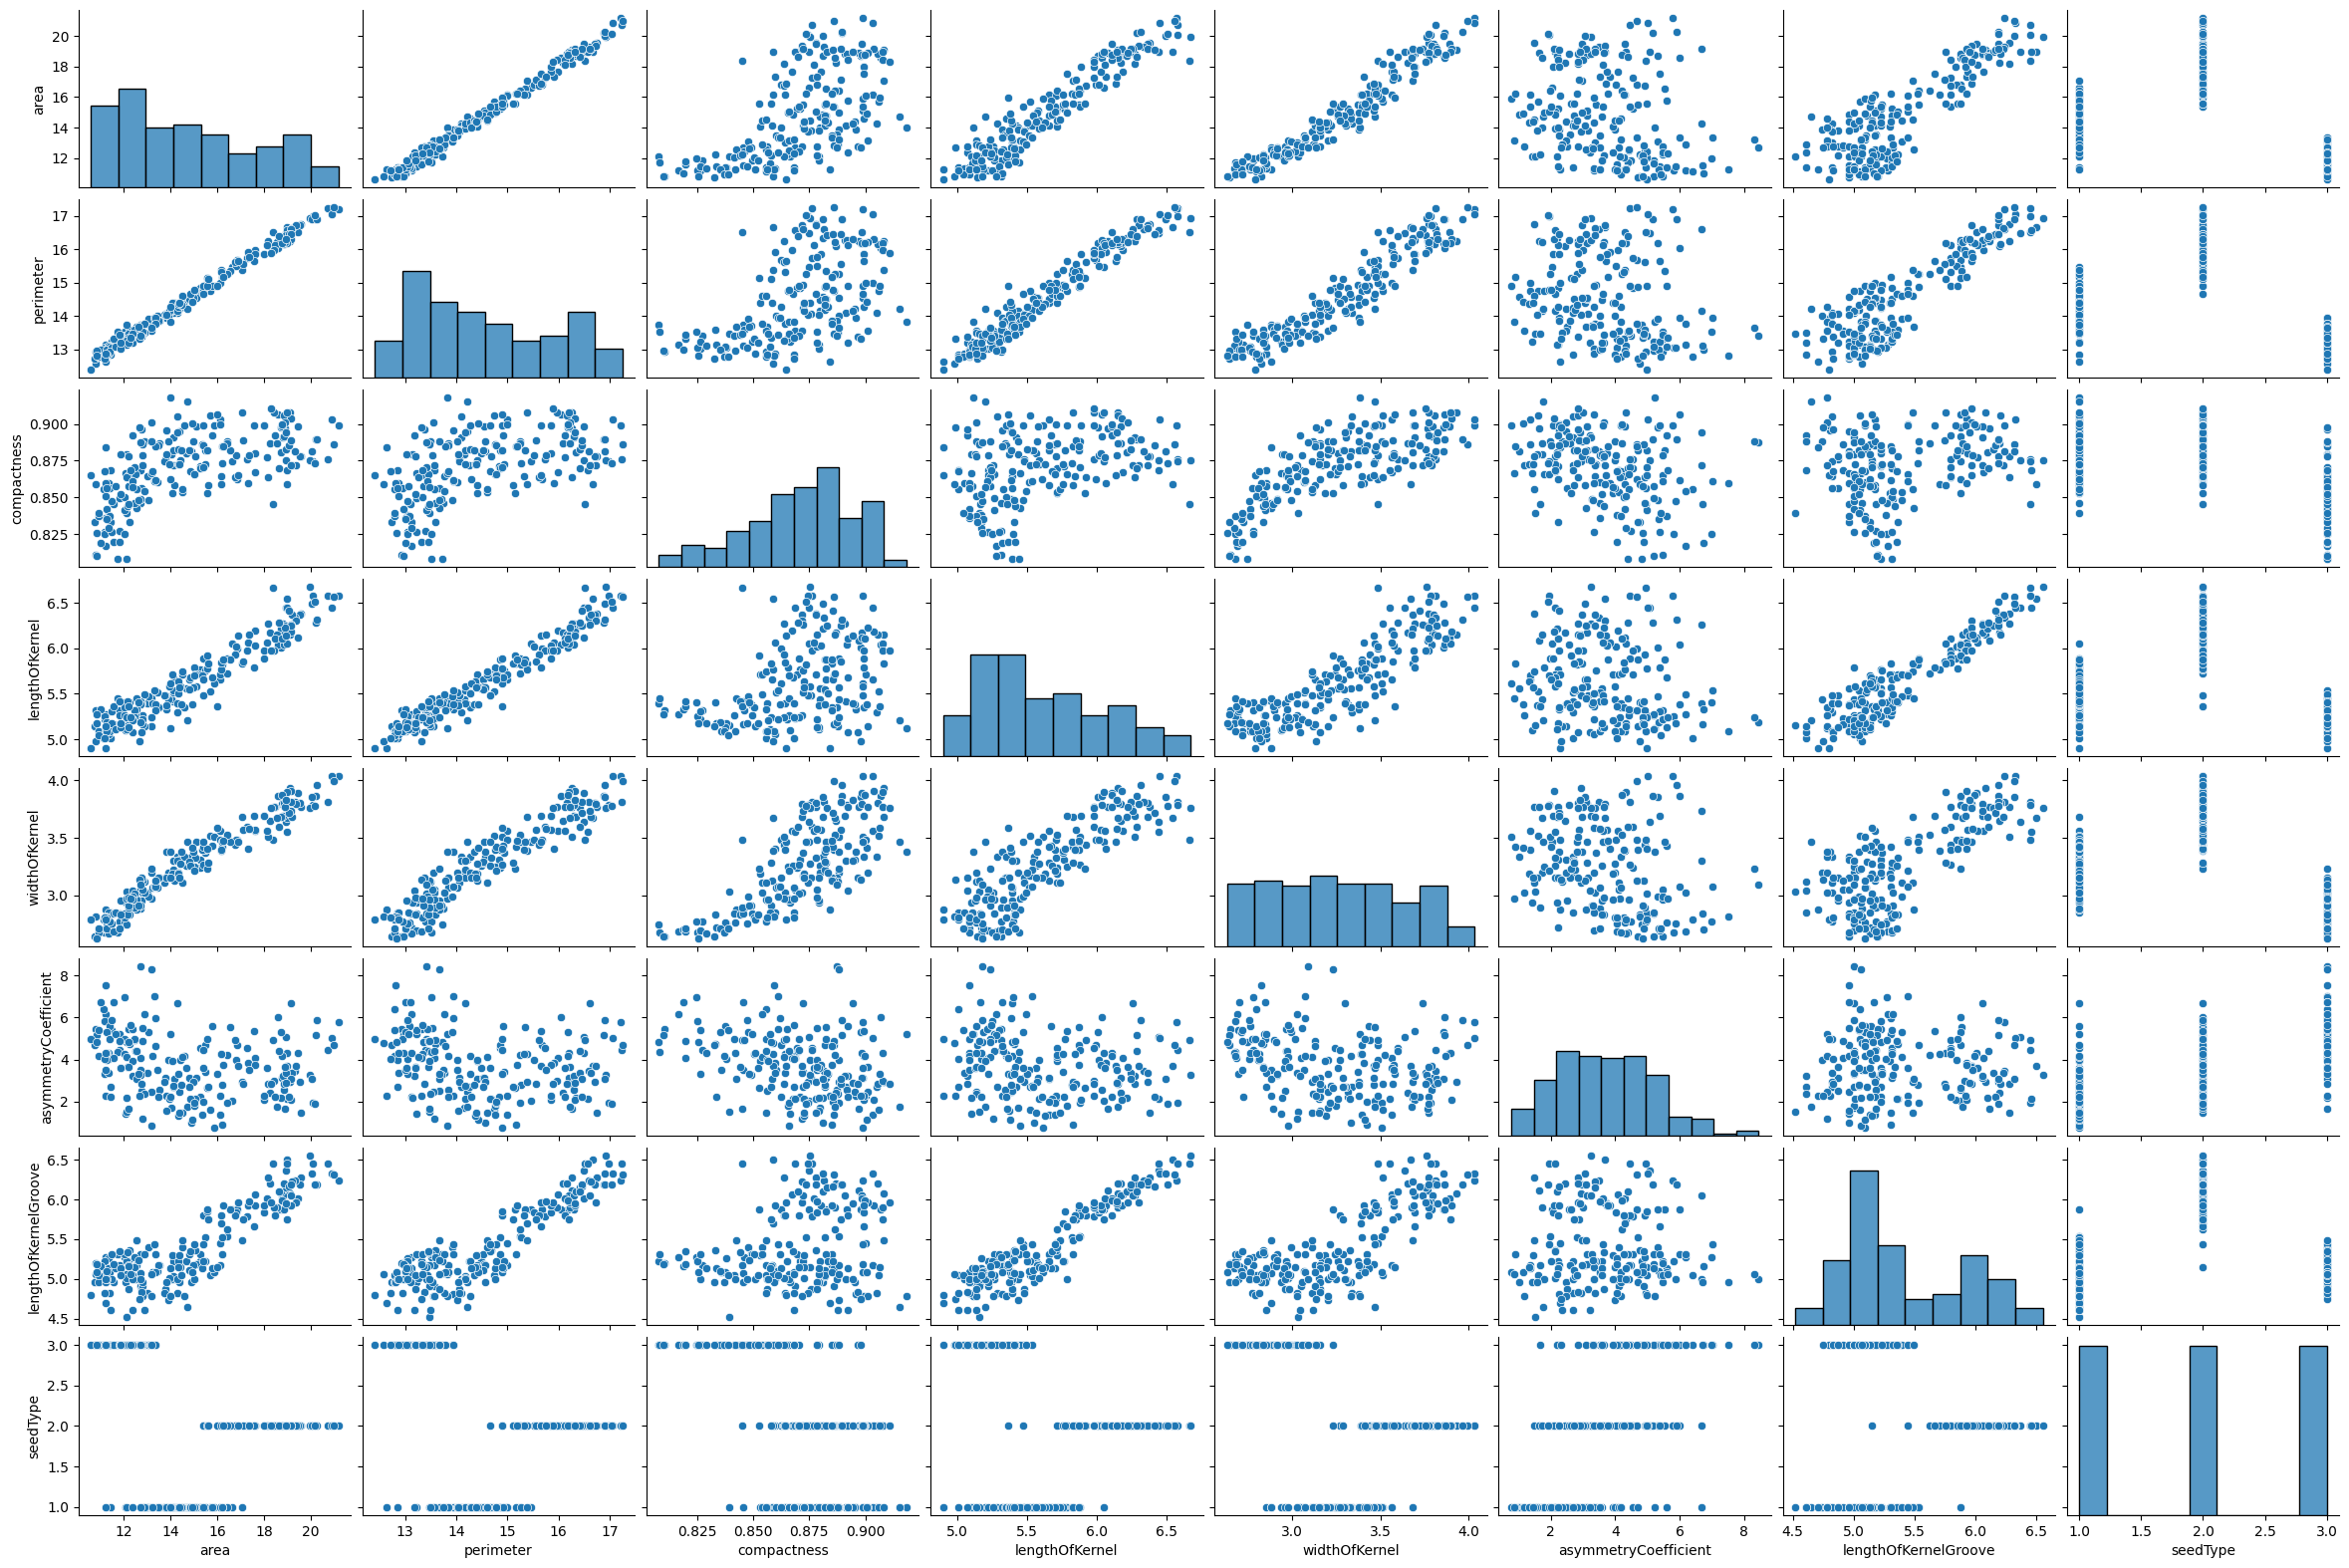

In [7]:
import seaborn as sns
plt.figure(figsize=(3, 2))
sns.pairplot(df, height=2, aspect=1.5)
plt.show()

### Transform the data

In [8]:
scaler=StandardScaler()
df[features_T]=scaler.fit_transform(df[features])

In [9]:
df1=df
print(df1.head())

     area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
ID                                                                 
1   15.26      14.84       0.8710           5.763          3.312   
2   14.88      14.57       0.8811           5.554          3.333   
3   14.29      14.09       0.9050           5.291          3.337   
4   13.84      13.94       0.8955           5.324          3.379   
5   16.14      14.99       0.9034           5.658          3.562   

    asymmetryCoefficient  lengthOfKernelGroove  seedType    area_T  \
ID                                                                   
1                  2.221                 5.220         1  0.142098   
2                  1.018                 4.956         1  0.011188   
3                  2.699                 4.825         1 -0.192067   
4                  2.259                 4.805         1 -0.347091   
5                  1.355                 5.175         1  0.445257   

    perimeter_T  compactness_T  

### Clustering the data

In [10]:
df1[features_T].describe()

,area_T,perimeter_T,compactness_T,lengthOfKernel_T,widthOfKernel_T,asymmetryCoefficient_T,lengthOfKernelGroove_T
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.184238e-16,1.285744e-15,-2.097793e-15,-3.383537e-16,-3.383537e-16,-8.987520e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [11]:
df2=df1[features_T]
df2

,area_T,perimeter_T,compactness_T,lengthOfKernel_T,widthOfKernel_T,asymmetryCoefficient_T,lengthOfKernelGroove_T
ID,,,,,,,
1,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
2,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
3,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
4,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
5,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
206,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
207,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
208,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060


### Reduction of Dimentions

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df2)

PCA()

In [27]:
display(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(df2.columns)
print(pca.singular_values_)

array([7.18743027e-01, 1.71081835e-01, 9.68576341e-02, 9.76635386e-03,
       2.67337271e-03, 7.61720812e-04, 1.16056686e-04])

[5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 5.35755786e-03 8.16283865e-04]
Index(['area_T', 'perimeter_T', 'compactness_T', 'lengthOfKernel_T',
       'widthOfKernel_T', 'asymmetryCoefficient_T', 'lengthOfKernelGroove_T'],
      dtype='object')
[32.50464965 15.85844563 11.93233934  3.78900253  1.98238692  1.05817276
  0.41304156]


In [29]:
import numpy as np

loadings = pd.DataFrame(data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(df2.columns) + 1)],
    index=df2.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
area_T,0.999351,-0.029139,0.021353,0.050751,0.028030,-0.031213,0.020994
perimeter_T,0.992826,-0.092147,-0.049390,0.077436,0.023898,-0.034858,-0.019164
compactness_T,0.622844,0.580453,0.519733,-0.087228,-0.045615,-0.010367,-0.002073
lengthOfKernel_T,0.952337,-0.225945,-0.174881,0.069036,-0.105051,0.020025,0.001322
widthOfKernel_T,0.973147,0.128003,0.178680,0.052321,0.063813,0.051457,-0.001123


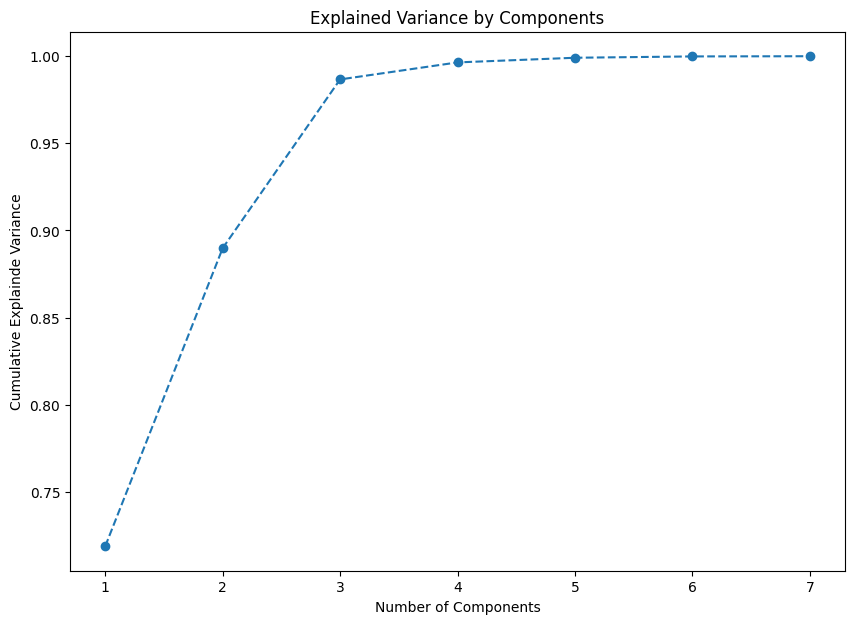

In [19]:
# Plot PCA
plt.figure(figsize=(10,7))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explainde Variance')
plt.show()

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.cluster import KMeans

clux_kmeans = KMeans(n_clusters=2)
df2['clusters'] = clux_kmeans.fit_predict(df2)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df2['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
print(type(results))
print(results)

### Choose de K Elbow METHOD

In [ ]:
def optimize_k_m(data,max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # Plot the Elbow
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('# Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()


In [ ]:
optimize_k_m(results[['pca1','pca2']],10)

### So, with the elbow method we choose 3 clusters

In [ ]:
print(df2.shape)

In [ ]:
df2.drop('clusters', axis=1, inplace=True)

In [ ]:
print(df2.shape)
print(type(df2))

### Clustering the data with Pandas DF2

In [ ]:
kmeans =  KMeans(n_clusters=3, random_state=33)
kmeans.fit(df2)
df2['Kmeans_3'] = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
display(df2)

In [ ]:
# Display a barplot of the 3 clusters
sns.catplot(data=df2, x="Kmeans_3", kind="count")
plt.show()

### Ploting the Klusters of the Data, we will use the ones who absorb the most of variance (area_T', 'perimeter_T', 'compactness_T).

In [ ]:
# Separe the dataframe df2 in 3 frames
data1 = df2[df2.Kmeans_3==0]
data2 = df2[df2.Kmeans_3==1]
data3 = df2[df2.Kmeans_3==2]

In [ ]:
data3

In [ ]:
# Display the clusters
import numpy as np
from mpl_toolkits.mplot3d import axes3d

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 2, 3)
yline = np.linspace(0, 2, 3)
zline = np.linspace(0, 2, 3)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.view_init(elev=30, azim=-70)
kplot.scatter3D(data1.area_T, data1.perimeter_T, data1.compactness_T,  c='red', label = 'Cluster 1')
kplot.scatter3D(data2.area_T, data2.perimeter_T, data2.compactness_T,  c ='black', label = 'Cluster 2')
kplot.scatter3D(data3.area_T, data3.perimeter_T, data3.compactness_T,  c ='green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'gold', s = 40)
plt.legend()
plt.title("Kmeans")
plt.tight_layout()
plt.show()

### Dendogram

In [ ]:
# Import libraries
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [ ]:
np.set_printoptions (precision=2,suppress= True)

In [ ]:
plt.figure(figsize=(20, 9))
# This code wraps the computed distance matrix into a new Pandas DataFrame.
ytdist=pd.DataFrame(distance_matrix(df2.values, df2.values), index=df2.index, columns=df2.index)
# This controls the threshols
t=15
# The creation of a linkage matrix, is used to build a hierarchical tree-like structure (dendrogram) that represents the relationships between data points.
linkage_matrix = linkage(ytdist, "centroid")
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, orientation='right',distance_sort='descending',show_leaf_counts=True, show_contracted=True,  color_threshold=t)
plt.title("Dendrogram Using centroid Linkage")
plt.xlabel('Distance')
plt.ylabel('Clusters/Size')
plt.axvline(x=t, c='grey', lw=1, linestyle='dashed')
plt.show()

### Predictions

In [ ]:
# Scale the data
new_data = np.array([-1.,  1., 0.])
new_data_scaled = scaler.transform(new_data)
# Feed values
Feat_1 =
Feat_2 =
Feat_3 =
Feat_4 =

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y

print(df.head())